In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (24,18)
plt.rcParams.update({'font.size': 32})

### Cargar Datos
Usaremos de ejemplo un dataset de observaciones de una estrella en donde podemos encontrar la magnitud de luz captada en un tiempo determinado

In [1]:
data = pd.read_csv('ts.csv')

NameError: name 'pd' is not defined

### Graficar Datos

### Creación de modelos
El objetivo es encontrar un polinomio de un grado n que se ajuste lo mas posible a los datos que cargamos del CSV. Primero realizaremos una prueba con una regresión lineal simple para ver cual es la recta que se ajustaria a este modelo.

In [10]:
def poly_reg_fit(x,y):
  x = np.array(x)
  y = np.array(y)
  x_array = np.concatenate((np.ones(x.shape),x,x**2,x**3, x**4)).reshape(5,-1)
  print(x_array.shape)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  print(x_transpose.shape)
  intercept_beta = np.dot(x_inv,x_dot_y)
  return intercept_beta

def poly_pred(x, coefficients):
  return coefficients[0] + np.dot(coefficients[1], x) + np.dot(coefficients[2], x**2) + np.dot(coefficients[3], x**3) +np.dot(coefficients[4], x**4)

poly_reg_fit(data['tiempo'], data['magnitud'])

(5, 1222)
(1222, 5)


array([-5.02389512e+00,  5.50114402e-04, -9.28716186e-07,  6.39062014e-10,
       -1.45245967e-13])

1222


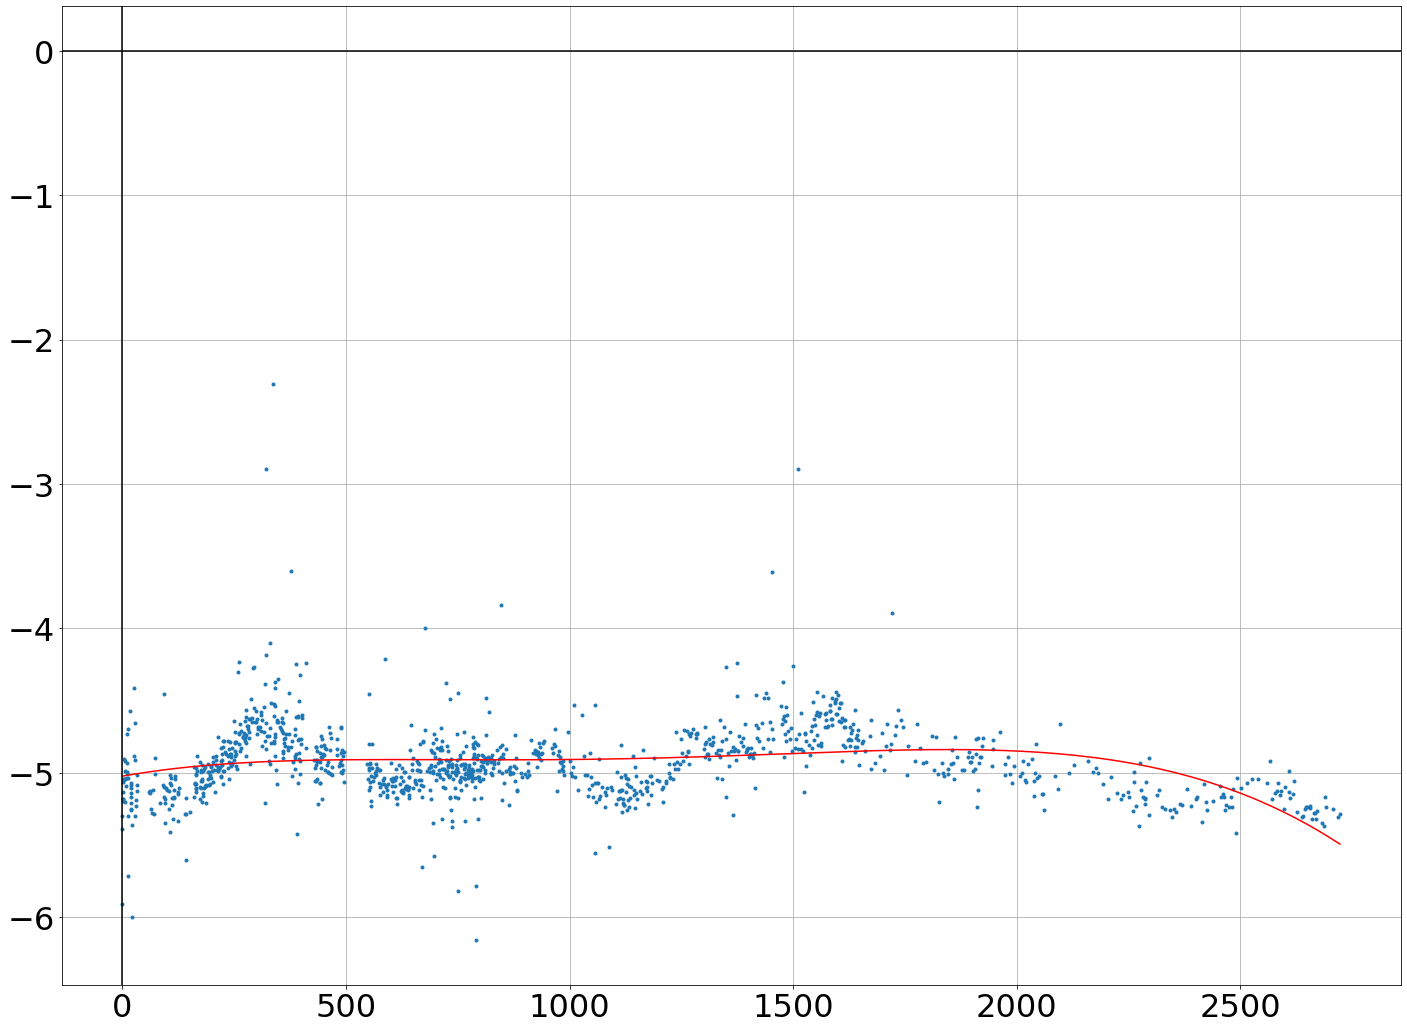

In [63]:
y_poly_preds = poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud']))
print(len(y_poly_preds))
#plt.xlabel('Hours of Mining')
#plt.ylabel('Cost to Mine Bitcoin')
plt.plot(data['tiempo'], data['magnitud'] , '.')
plt.plot(data['tiempo'], y_poly_preds, color = 'red', label='Polynomial Regression')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
#cost_label = ['$' + str(cost) for cost in range(-200,2000,200)]
#plt.yticks(range(-200,2000,200), cost_label)
plt.grid()